### Importing 

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Reading dataSet

In [145]:
dataSet_Address = r"D:\Payam\UT\Machin Learning\MyCode\Classification\HeartProject\Heart_DataSet.csv"
df = pd.read_csv(dataSet_Address)
#df = my_df.sort_values(by=['age'] ,  ascending=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Pre-processing

* checking age values

In [146]:
print(df['age'].value_counts())
print("Mean of age : ",df['age'].mean().astype(int))

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
Mean of age :  54


* checking fbs

In [147]:
print(df['fbs'].value_counts())

0    258
1     45
Name: fbs, dtype: int64


* checking trtbps

In [148]:
print(df["trtbps"].value_counts())
print("Mean of trtbps : ",df["trtbps"].mean().astype(int))

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trtbps, dtype: int64
Mean of trtbps :  131


* checking chol value

In [149]:
print(df["chol"].value_counts())
print("Mean of chol : ",df["chol"].mean().astype(int))

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64
Mean of chol :  246


### Displaying on scatter

Text(0, 0.5, 'Chances of a heart attack')

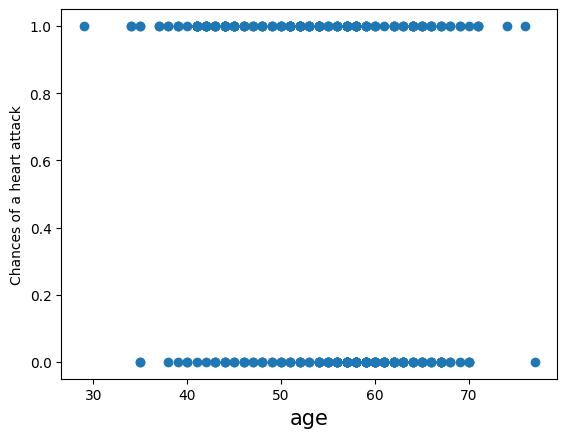

In [150]:
plt.scatter(df.age , df.output)
plt.xlabel("age" , fontsize=15)
plt.ylabel("Chances of a heart attack" , fontsize=10)

Text(0, 0.5, 'Chances of a heart attack')

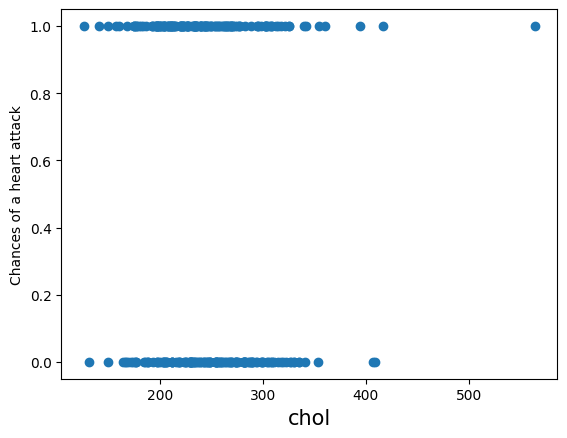

In [151]:
plt.scatter(df.chol , df.output)
plt.xlabel("chol" , fontsize=15)
plt.ylabel("Chances of a heart attack" , fontsize=10)

Text(0, 0.5, 'Chances of a heart attack')

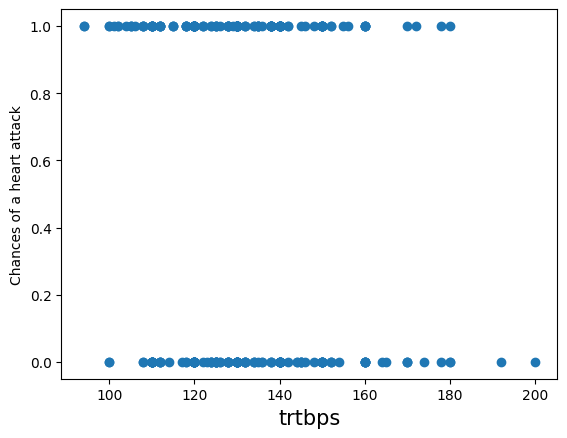

In [152]:
plt.scatter(df.trtbps , df.output)
plt.xlabel("trtbps" , fontsize=15)
plt.ylabel("Chances of a heart attack" , fontsize=10)

Text(0, 0.5, 'Chances of a heart attack')

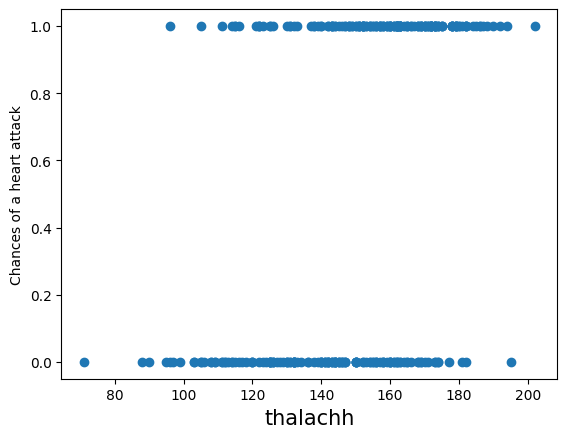

In [153]:
plt.scatter(df.thalachh , df.output)
plt.xlabel("thalachh" , fontsize=15)
plt.ylabel("Chances of a heart attack" , fontsize=10)

Text(0, 0.5, 'Chances of a heart attack')

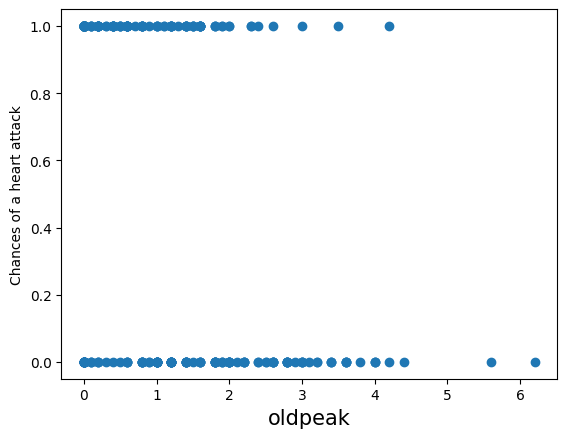

In [154]:
plt.scatter(df.oldpeak , df.output)
plt.xlabel("oldpeak" , fontsize=15)
plt.ylabel("Chances of a heart attack" , fontsize=10)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

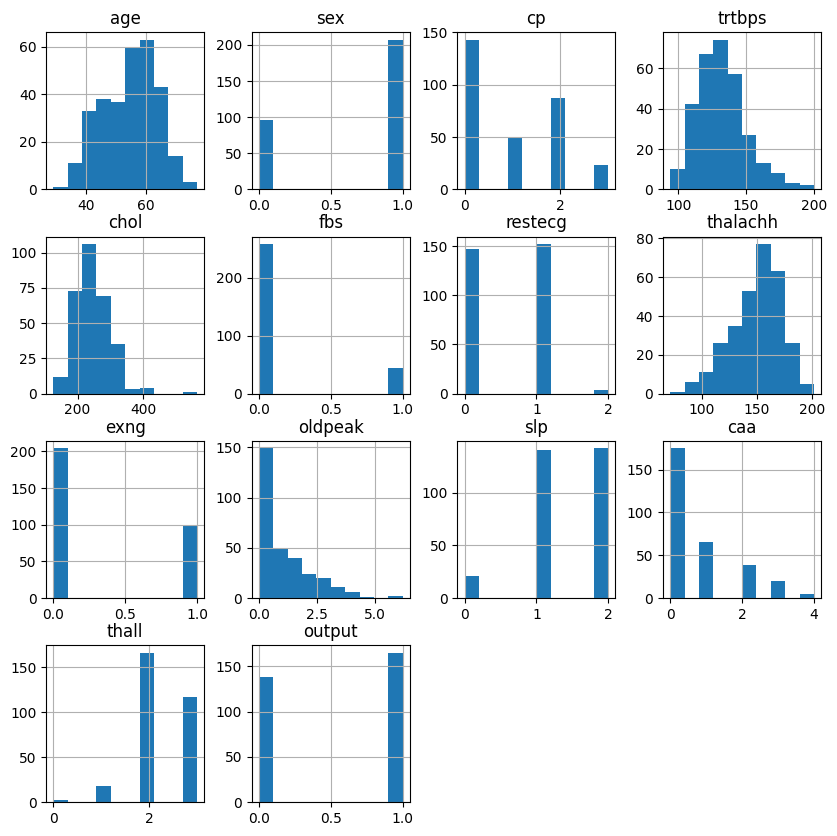

In [155]:
df.hist(figsize=(10,10))

## Deviding to x and y data .
* as I understand fbs values is not use full to train so we delete this data .

In [159]:
Xdata = df[["age"	,"sex",	"cp",	"trtbps"	,"chol",	"restecg"	,"thalachh"	,"exng",	"oldpeak"	,"slp",	"caa"	,"thall"]].values
ydata = df["output"].values
Xdata[0:5]


array([[ 63. ,   1. ,   3. , 145. , 233. ,   0. , 150. ,   0. ,   2.3,
          0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   1. , 187. ,   0. ,   3.5,
          0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. , 172. ,   0. ,   1.4,
          2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   1. , 178. ,   0. ,   0.8,
          2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   1. , 163. ,   1. ,   0.6,
          2. ,   0. ,   2. ]])

## Normalize

In [172]:
Xdata = preprocessing.StandardScaler().fit(Xdata).transform(Xdata.astype(float))
print(Xdata)


[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>]], dtype=object)

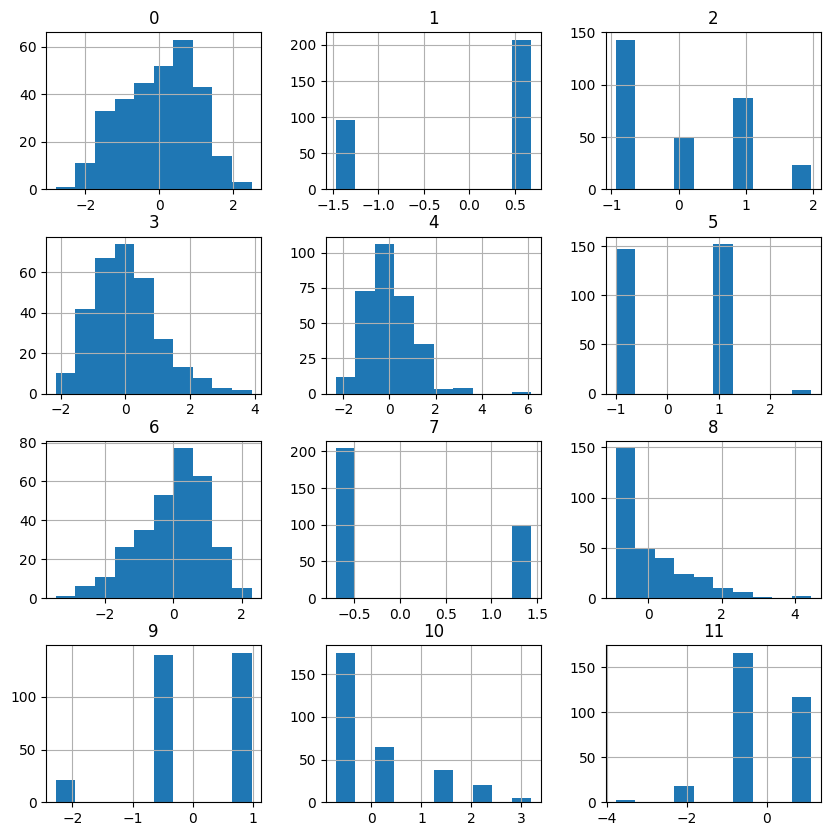

In [177]:
Xdata_dataFrame = pd.DataFrame(Xdata) 
Xdata_dataFrame.hist(figsize=(10,10))

### Splitting to train and test data 

In [182]:
X_train , X_test , Y_train , Y_test = train_test_split(Xdata , ydata , random_state=4 , test_size=0.2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (242, 12) (242,)
Test set: (61, 12) (61,)


### Modelling KNN

In [186]:
Ks = 10 
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors= n ).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test , yhat)
mean_acc



array([0.7704918 , 0.78688525, 0.85245902, 0.83606557, 0.83606557,
       0.85245902, 0.85245902, 0.8852459 , 0.83606557])

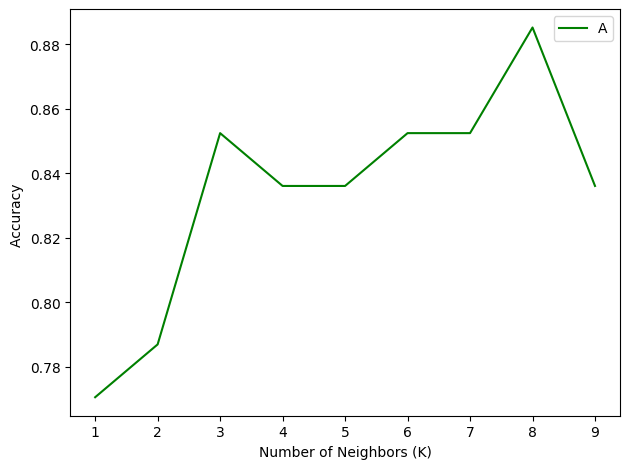

In [190]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()